Итоговая работа должна отвечать следующим требованиям:

1. Программа реализована на языке программирования Python.
2. Выполнена загрузка и чтение данных из файлов.
3. Выполнена предварительная обработка данных (очистка и форматирование данных).
4. Выполнен разведочный анализ данных EDA.
5. Определены важные признаки. Выполнен поиск взаимосвязей между признаками.
6. Выполнено уменьшение размерности массива данных.
7. Составлена гипотеза о данных и выполнена проверка соответствующей гипотезы.

Аналитическая задача: построить модель для прогнозирования стоимости квартиры.


Исходные данные: имеется выборка данных о продаже квартир. 

|Признак|Описание признака|
|-------------:|:------------|
|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|
|balcony|число балконов|
|ceiling_height|высота потолков (м)|
|cityCenters_nearest|расстояние до центра города (м)|
|floor|этаж|
|floors_total| всего этажей в доме|
|is_apartment|апартаменты (булев тип)|
|kitchen_area|площадь кухни в квадратных метрах (м²)|
|last_price|цена на момент снятия с публикации|
|living_area|жилая площадь в квадратных метрах(м²)|
|open_plan|свободная планировка (булев тип)|
|parks_around3000|число парков в радиусе 3 км|
|parks_nearest|расстояние до ближайшего парка (м)|
|ponds_around3000|число водоёмов в радиусе 3 км|
|ponds_nearest|расстояние до ближайшего водоёма (м)|
|rooms|число комнат|
|studio|квартира-студия (булев тип)|
|total_area|площадь квартиры в квадратных метрах (м²)|

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

**Шаг 4.** Построить регрессионные и классификационные модели 
- построить несколько моделей регрессии с различным набором признаков и сравнить их по метрикам (MSE, $R^2$, MAPE). 
- провести разбиение целевого признака на 5 интервалов и построить соответствующие классификационные модели.

**Шаг 5.** Проверка гипотез
- сформулировать и проверить гипотезу о равенстве средних площадей кухни в 2-х и 3-х квартирах.

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score, mean_absolute_percentage_error
from scipy.stats import anderson
from scipy.stats import mannwhitneyu

###Загрузка данных

In [2]:
df=pd.read_csv('home_price.csv')
df.head(3)

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,13000000.0,108.0,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0
1,3350000.0,40.4,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN
2,5196000.0,56.0,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           23699 non-null  float64
 1   total_area           23699 non-null  float64
 2   rooms                23699 non-null  int64  
 3   ceiling_height       14504 non-null  float64
 4   floors_total         23613 non-null  float64
 5   living_area          21796 non-null  float64
 6   floor                23699 non-null  int64  
 7   is_apartment         2775 non-null   object 
 8   studio               23699 non-null  bool   
 9   open_plan            23699 non-null  bool   
 10  kitchen_area         21421 non-null  float64
 11  balcony              12180 non-null  float64
 12  airports_nearest     18157 non-null  float64
 13  cityCenters_nearest  18180 non-null  float64
 14  parks_around3000     18181 non-null  float64
 15  parks_nearest        8079 non-null  

###Предобработка данных

In [4]:
df.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

Признаки floors_total, balcony, parks_around3000, ponds_around3000 содержат целые числа, но тип данных float. Необходимо изменить тип данных для дальнейшей работы

In [5]:
df[['floors_total', 'balcony', 'parks_around3000', 'studio', 'open_plan',
    'ponds_around3000']]=df[['floors_total', 'balcony', 'parks_around3000', 
    'studio', 'open_plan', 'ponds_around3000']].convert_dtypes()

Признак is_apartment имеет только 2775 заполненых значений, ее удалим

In [6]:
df.drop(columns=['is_apartment'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  float64
 1   total_area            23699 non-null  float64
 2   rooms                 23699 non-null  int64  
 3   ceiling_height        14504 non-null  float64
 4   floors_total          23613 non-null  Int64  
 5   living_area           21796 non-null  float64
 6   floor                 23699 non-null  int64  
 7   studio                23699 non-null  boolean
 8   open_plan             23699 non-null  boolean
 9   kitchen_area          21421 non-null  float64
 10  balcony               12180 non-null  Int64  
 11  airports_nearest      18157 non-null  float64
 12  city_centers_nearest  18180 non-null  float64
 13  parks_around3000      18181 non-null  Int64  
 14  parks_nearest         8079 non-null   float64
 15  ponds_around3000   

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

**Работа с аномалиями**

In [10]:
proc=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
df.describe(percentiles=proc)

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
count,2.369800e+04,23698.000000,23698.000000,14503.000000,23612.000000,21795.000000,23698.000000,23698,23698,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23549,23631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.541718e+06,60.349404,2.070681,2.771513,10.673513,34.458525,5.892312,NaN,NaN,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900
std,1.088721e+07,35.654647,1.078405,1.261098,6.597140,22.030727,4.885347,NaN,NaN,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000
1%,1.000000e+06,25.198500,1.000000,2.500000,2.000000,13.000000,1.000000,NaN,NaN,5.000000,0.000000,9412.560000,1326.580000,0.000000,24.000000,0.000000,35.090000
5%,1.870000e+06,31.000000,1.000000,2.500000,4.000000,15.200000,1.000000,NaN,NaN,5.500000,0.000000,11557.400000,3541.000000,0.000000,95.900000,0.000000,93.000000
10%,2.500000e+06,33.000000,1.000000,2.500000,5.000000,16.400000,1.000000,NaN,NaN,6.000000,0.000000,13461.000000,4766.000000,0.000000,159.000000,0.000000,145.000000


In [11]:
columns_rus=['цена', 'площадь', 'количество комнат', 'высота потолков', 'этажность дома', 
             'жилая площадь', 'этаж', 'студия', 'открытая планировка', 'площадь_кухни', 
             'балкон', 'близость аэропорта', 'расстояние до центра', 'парков в радиусе 3 км',
             'ближайший парк', 'прудов в радиусе 3 км', 'ближайший пруд']

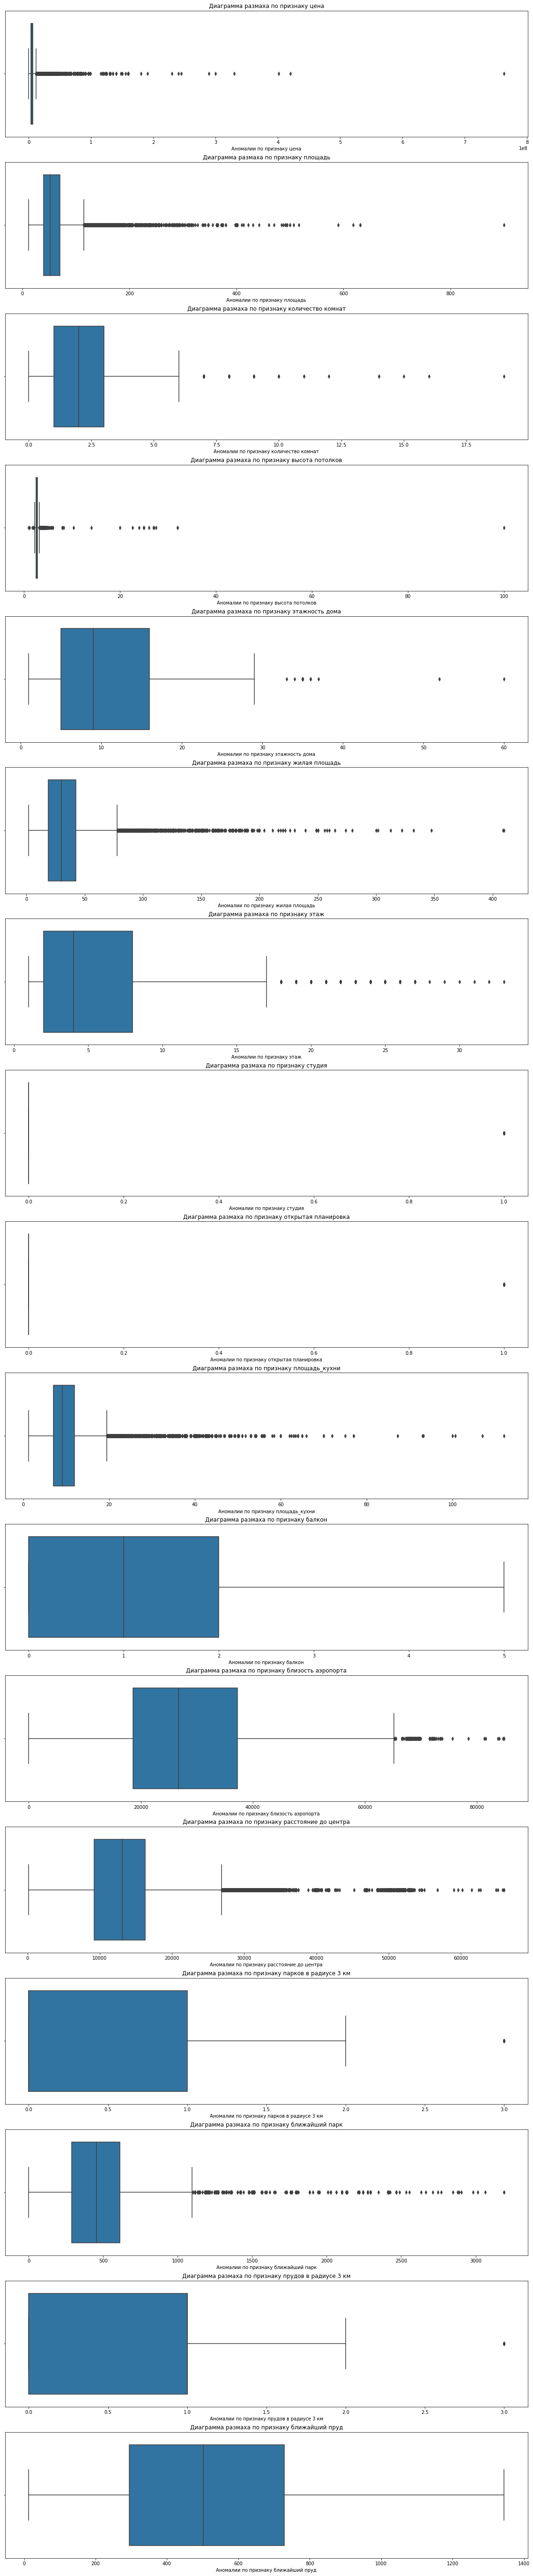

In [12]:
fig, axes=plt.subplots(17, 1, figsize=(20, 100))
ris=1
for i, col in enumerate(df.columns):
  plt.subplot(17,1,ris)
  ax=sns.boxplot(x=df[col])
  ax.set_xlabel('Аномалии по признаку {}'.format(columns_rus[i]))
  ax.set_title('Диаграмма размаха по признаку {}'.format(columns_rus[i]))
  ris+=1

У нас целевой признак цена на квартиры, жилая площадь и площадь кухни, поэтому было решено убрать аномалии по этим признакам.
При помощи метода describe и диаграммы размаха было решено оставить только те объекты, которые соответствуют 95% верхняя граница и 5% нижняя граница.

*Верхняя граница*

In [13]:
df=df[(df.total_area<110)&(df.last_price <15000000)&(df.kitchen_area<20)]
df

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
1,3350000.0,40.4,1,NaN,11,18.6,1,False,False,11.0,2,12817.0,18603.0,0,NaN,0,NaN
2,5196000.0,56.0,2,NaN,5,34.3,4,False,False,8.3,0,21741.0,13933.0,1,90.0,2,574.0
5,2890000.0,30.4,1,NaN,12,14.4,5,False,False,9.1,<NA>,NaN,NaN,<NA>,NaN,<NA>,NaN
6,3700000.0,37.3,1,NaN,26,10.6,6,False,False,14.4,1,52996.0,19143.0,0,NaN,0,NaN
7,7915000.0,71.6,2,NaN,24,NaN,22,False,False,18.9,2,23982.0,11634.0,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,9470000.0,72.9,2,2.75,25,40.3,7,False,False,10.6,1,19424.0,4489.0,0,NaN,1,806.0
23692,1350000.0,30.0,1,NaN,5,17.5,4,False,False,6.0,<NA>,NaN,NaN,<NA>,NaN,<NA>,NaN
23693,4600000.0,62.4,3,2.60,9,40.0,8,False,False,8.0,0,45602.0,34104.0,1,352.0,1,675.0
23695,3100000.0,59.0,3,NaN,5,38.0,4,False,False,8.5,<NA>,NaN,NaN,<NA>,NaN,<NA>,NaN


*Нижняя граница*

In [14]:
df=df[(df.total_area>30)&(df.last_price>1500000)&(df.kitchen_area>5)]
df

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
1,3350000.0,40.4,1,NaN,11,18.6,1,False,False,11.0,2,12817.0,18603.0,0,NaN,0,NaN
2,5196000.0,56.0,2,NaN,5,34.3,4,False,False,8.3,0,21741.0,13933.0,1,90.0,2,574.0
5,2890000.0,30.4,1,NaN,12,14.4,5,False,False,9.1,<NA>,NaN,NaN,<NA>,NaN,<NA>,NaN
6,3700000.0,37.3,1,NaN,26,10.6,6,False,False,14.4,1,52996.0,19143.0,0,NaN,0,NaN
7,7915000.0,71.6,2,NaN,24,NaN,22,False,False,18.9,2,23982.0,11634.0,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,3550000.0,35.3,1,2.86,15,16.3,4,False,False,9.1,2,17284.0,16081.0,1,353.0,2,652.0
23690,5500000.0,52.0,2,NaN,5,31.0,2,False,False,6.0,<NA>,20151.0,6263.0,1,300.0,0,NaN
23691,9470000.0,72.9,2,2.75,25,40.3,7,False,False,10.6,1,19424.0,4489.0,0,NaN,1,806.0
23693,4600000.0,62.4,3,2.60,9,40.0,8,False,False,8.0,0,45602.0,34104.0,1,352.0,1,675.0


In [15]:
df.describe(percentiles=proc)

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
count,1.797900e+04,17979.000000,17979.000000,11357.000000,17947.000000,17643.000000,17979.000000,17979,17979,17979.000000,9854.000000,14051.000000,14065.000000,14066.000000,5872.000000,14066.000000,6705.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17979,17979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.155226e+06,54.404486,1.973191,2.730840,11.040397,31.158006,6.037154,NaN,NaN,9.531490,1.183276,29021.835385,14812.057803,0.555879,489.290020,0.706242,529.634452
std,2.356175e+06,17.554879,0.874894,0.976914,6.572512,12.897301,4.909172,NaN,NaN,2.929317,1.059050,12930.814587,8350.993538,0.760310,327.615817,0.893003,275.855012
min,1.510000e+06,30.100000,1.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,5.040000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000
1%,1.700000e+06,30.900000,1.000000,2.500000,2.000000,13.742600,1.000000,NaN,NaN,5.300000,0.000000,9354.000000,1905.280000,0.000000,21.710000,0.000000,46.000000
5%,2.300000e+06,32.000000,1.000000,2.500000,4.000000,15.500000,1.000000,NaN,NaN,5.700000,0.000000,11596.500000,4232.400000,0.000000,91.000000,0.000000,100.000000
10%,2.750000e+06,34.196000,1.000000,2.500000,5.000000,16.600000,1.000000,NaN,NaN,6.000000,0.000000,13378.000000,5584.200000,0.000000,162.000000,0.000000,153.000000


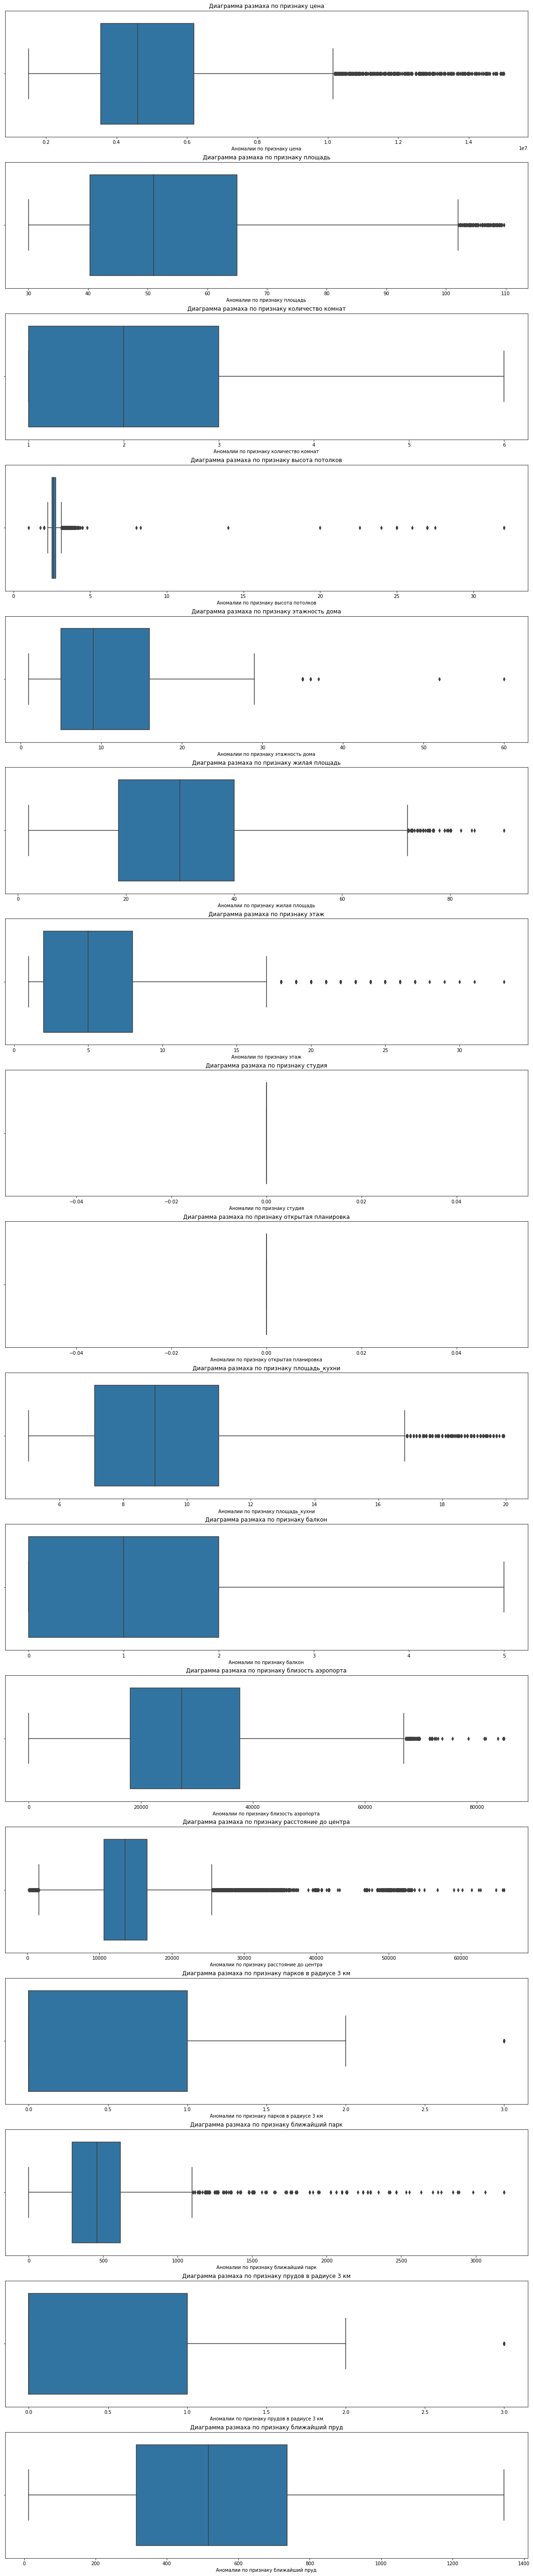

In [16]:
fig, axes=plt.subplots(17, 1, figsize=(20, 100))
ris=1
for i, col in enumerate(df.columns):
  plt.subplot(17,1,ris)
  ax=sns.boxplot(x=df[col])
  ax.set_xlabel('Аномалии по признаку {}'.format(columns_rus[i]))
  ax.set_title('Диаграмма размаха по признаку {}'.format(columns_rus[i]))
  ris+=1

**Работа с пропусками**

In [17]:
df.isna().sum()

last_price                  0
total_area                  0
rooms                       0
ceiling_height           6622
floors_total               32
living_area               336
floor                       0
studio                      0
open_plan                   0
kitchen_area                0
balcony                  8125
airports_nearest         3928
city_centers_nearest     3914
parks_around3000         3913
parks_nearest           12107
ponds_around3000         3913
ponds_nearest           11274
dtype: int64

In [18]:
lt=list()
c=list()
cc=list()
for col in df.columns:
  lt.append(col)
  c.append(df[col].isna().sum())
  cc.append(round(df[col].isna().sum()/len(df)*100,1))
  dict_nan={'признак':lt, 'количество пропусков':c, 'пропуски в процентах':cc}
  df1=pd.DataFrame(data=dict_nan)
print(df1)

                 признак  количество пропусков  пропуски в процентах
0             last_price                     0                   0.0
1             total_area                     0                   0.0
2                  rooms                     0                   0.0
3         ceiling_height                  6622                  36.8
4           floors_total                    32                   0.2
5            living_area                   336                   1.9
6                  floor                     0                   0.0
7                 studio                     0                   0.0
8              open_plan                     0                   0.0
9           kitchen_area                     0                   0.0
10               balcony                  8125                  45.2
11      airports_nearest                  3928                  21.8
12  city_centers_nearest                  3914                  21.8
13      parks_around3000          

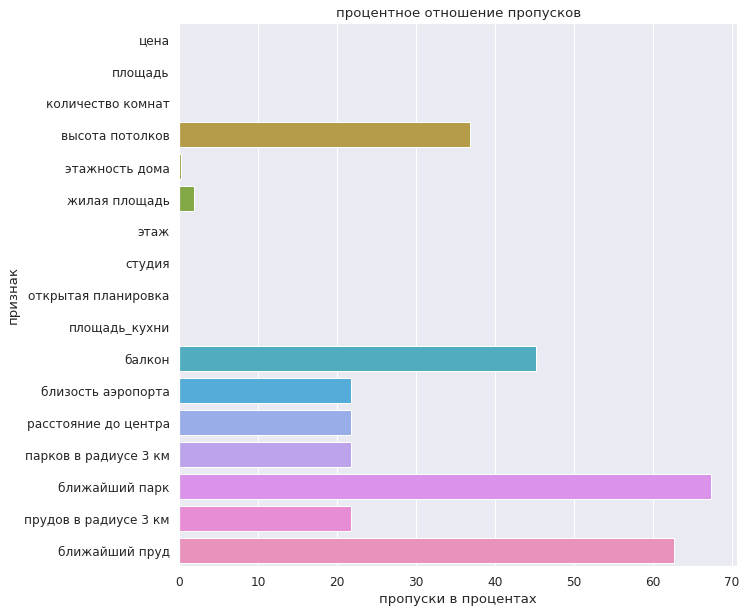

In [19]:
fig=plt.figure(figsize=(10,10))
sns.set(font_scale=1.1)
ax=sns.barplot(x=df1['пропуски в процентах'], y= df1['признак'])
ax.set_yticklabels(columns_rus)
plt.title('процентное отношение пропусков');

In [20]:
df['city_centers_nearest'].fillna(round(df['city_centers_nearest'].mean(),1), inplace=True)
df['airports_nearest'].fillna(round(df['airports_nearest'].mean(),1), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [21]:
df['balcony'].fillna(df['balcony'].mode()[0], inplace=True)
df['ceiling_height'].fillna(df['ceiling_height'].mean(), inplace=True)

При обработке признаков parks_nearest и ponds_nearest было выявлено, что , если в признаках parks_around3000 и ponds_around3000 стоит 0 или Nan,
то в parks_nearest и ponds_nearest стоит Nan, значит парк/пруд находится дальше 3000 м.

In [22]:
df.parks_nearest.fillna(3000, inplace=True)
df.ponds_nearest.fillna(3000, inplace=True)
df

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
1,3350000.0,40.4,1,2.73084,11,18.6,1,False,False,11.0,2,12817.0,18603.0,0,3000.0,0,3000.0
2,5196000.0,56.0,2,2.73084,5,34.3,4,False,False,8.3,0,21741.0,13933.0,1,90.0,2,574.0
5,2890000.0,30.4,1,2.73084,12,14.4,5,False,False,9.1,1,29021.8,14812.1,<NA>,3000.0,<NA>,3000.0
6,3700000.0,37.3,1,2.73084,26,10.6,6,False,False,14.4,1,52996.0,19143.0,0,3000.0,0,3000.0
7,7915000.0,71.6,2,2.73084,24,NaN,22,False,False,18.9,2,23982.0,11634.0,0,3000.0,0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,3550000.0,35.3,1,2.86000,15,16.3,4,False,False,9.1,2,17284.0,16081.0,1,353.0,2,652.0
23690,5500000.0,52.0,2,2.73084,5,31.0,2,False,False,6.0,1,20151.0,6263.0,1,300.0,0,3000.0
23691,9470000.0,72.9,2,2.75000,25,40.3,7,False,False,10.6,1,19424.0,4489.0,0,3000.0,1,806.0
23693,4600000.0,62.4,3,2.60000,9,40.0,8,False,False,8.0,0,45602.0,34104.0,1,352.0,1,675.0


По признаку parks_around3000 b ponds_around3000 мода и медиана равны 0, их заменим на 0

In [23]:

df.parks_around3000.fillna(df.parks_around3000.mode()[0], inplace=True)
df.ponds_around3000.fillna(df.ponds_around3000.mode()[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [24]:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [25]:
df.isna().sum()

last_price              0
total_area              0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
dtype: int64

##Разведочный анализ данных (EDA)

In [26]:
df.corr()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
last_price,1.000000,0.709456,0.437095,0.078458,0.155864,0.588573,0.111219,NaN,NaN,0.473671,0.096340,-0.045539,-0.308590,0.236566,-0.245651,0.266465,-0.245321
total_area,0.709456,1.000000,0.802797,0.069486,-0.037835,0.918575,-0.039279,NaN,NaN,0.405364,0.082453,-0.035242,-0.131341,0.086450,-0.079301,0.115680,-0.089326
rooms,0.437095,0.802797,1.000000,0.020144,-0.247244,0.898329,-0.186892,NaN,NaN,-0.017446,0.025022,-0.053516,-0.082125,0.070074,-0.065531,0.045490,-0.036693
ceiling_height,0.078458,0.069486,0.020144,1.000000,-0.014771,0.058985,-0.009806,NaN,NaN,0.062793,0.017397,-0.024923,-0.058249,0.039056,-0.029191,0.047144,-0.029098
floors_total,0.155864,-0.037835,-0.247244,-0.014771,1.000000,-0.201094,0.667377,NaN,NaN,0.398210,0.150066,0.093541,-0.006603,-0.160113,0.134789,-0.051223,0.003225
living_area,0.588573,0.918575,0.898329,0.058985,-0.201094,1.000000,-0.153304,NaN,NaN,0.129749,0.038239,-0.055355,-0.118194,0.112051,-0.101027,0.091771,-0.067964
floor,0.111219,-0.039279,-0.186892,-0.009806,0.667377,-0.153304,1.000000,NaN,NaN,0.266325,0.136871,0.067165,-0.000451,-0.110178,0.094614,-0.036439,0.002602
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen_area,0.473671,0.405364,-0.017446,0.062793,0.398210,0.129749,0.266325,NaN,NaN,1.000000,0.110716,0.012983,-0.098496,-0.032841,0.030220,0.089872,-0.076845


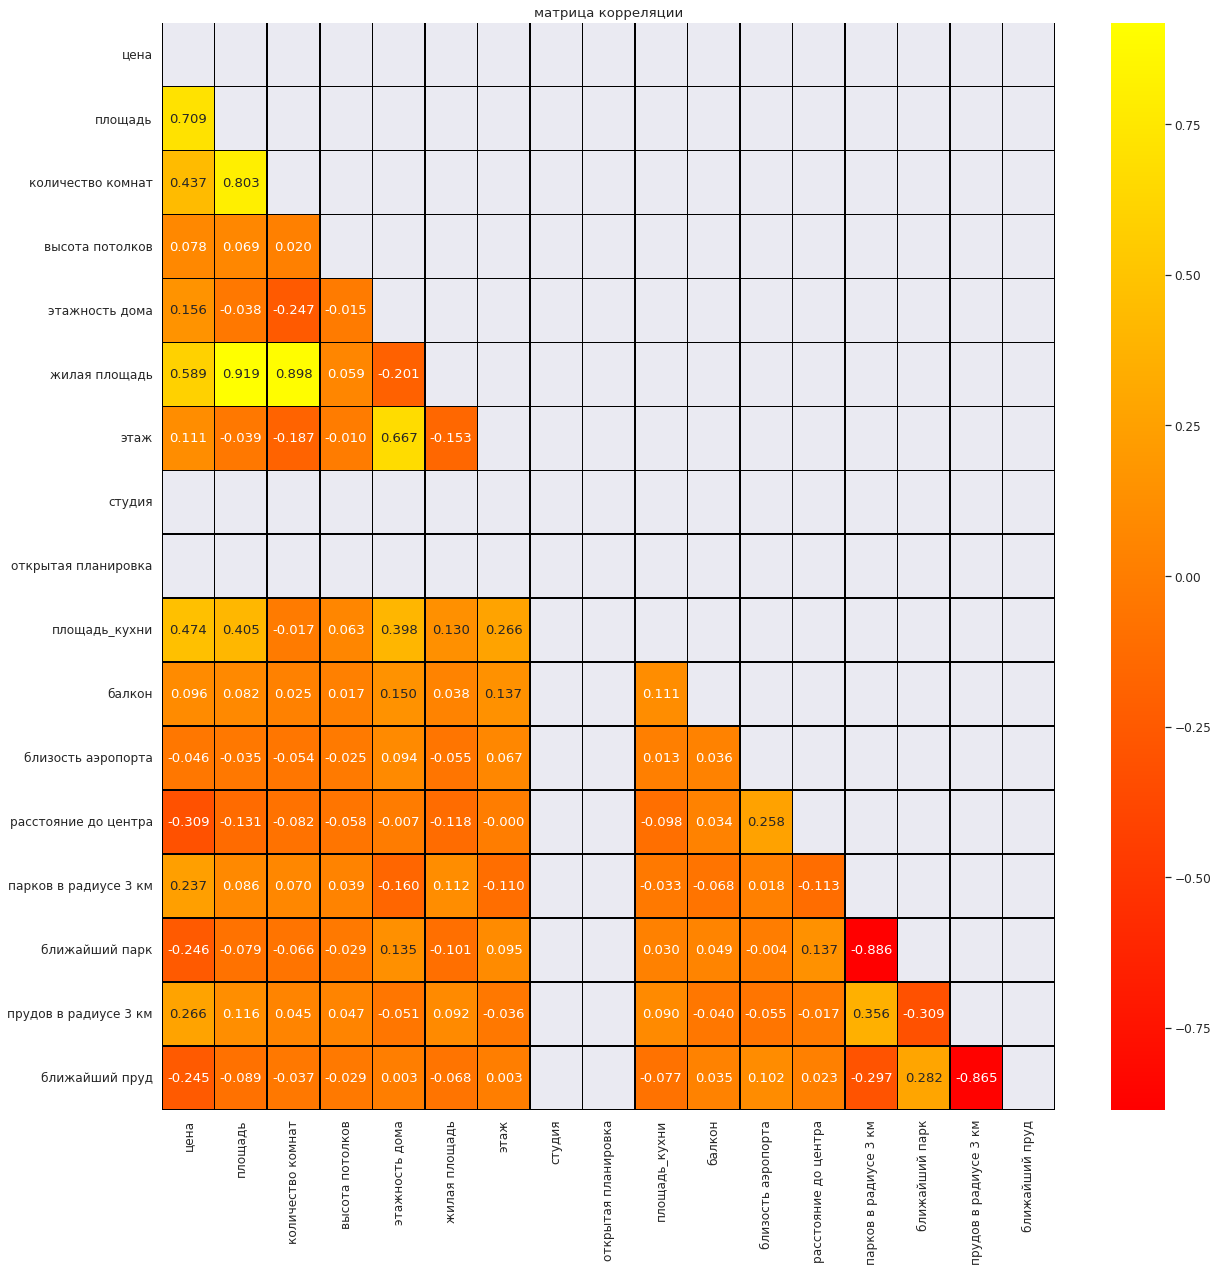

In [27]:
fig,ax=plt.subplots(figsize=(20,20))
ax=sns.heatmap(data=df.corr(),
                 annot=True,  
                 cmap='autumn', 
                 fmt='.3f', 
                 linewidths=0.5, 
                 linecolor='black', 
                 mask=np.triu(df.corr()))
ax.set_xticklabels(columns_rus)
ax.set_yticklabels(columns_rus)
plt.title('матрица корреляции');         

У цены (целевой показатель) высокий коэффициент корреляции с общей площадью, жилой площадью и количеством комнат; 
у жилой площади с общей площадью коэффициент равен 0,919, что значит , что они линейно зависимы, чтобы избежать мультиколениарность нужно удалить жилую площадь, т.к. по отношению к цене ее коэффициент ниже, чем у общей площади

In [28]:
df.drop('living_area', axis=1,  inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Диаграмма парных сравнений

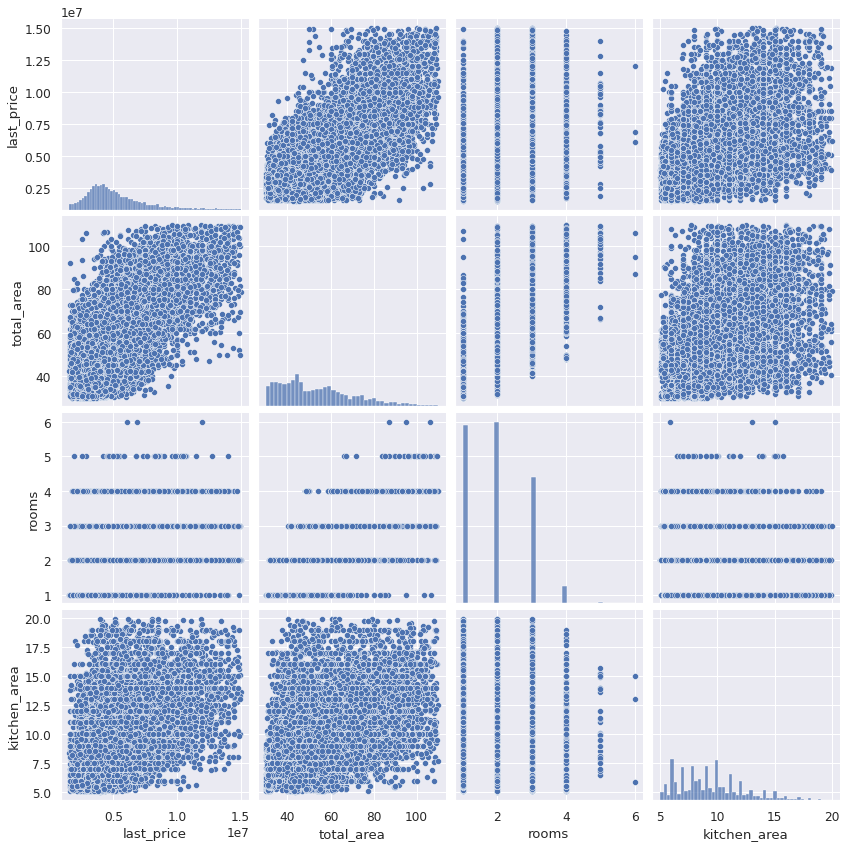

In [29]:
sns.pairplot(data=df[['last_price', 'total_area', 'rooms', 'kitchen_area']],height=3);

**Группировка данных**

In [30]:
 rooms=df.groupby('rooms').agg(count_rooms = ('rooms', 'count')).sort_values(by=['rooms']).reset_index()
 rooms

,rooms,count_rooms
0,1,6221
1,2,6320
2,3,4416
3,4,605
4,5,46
5,6,3


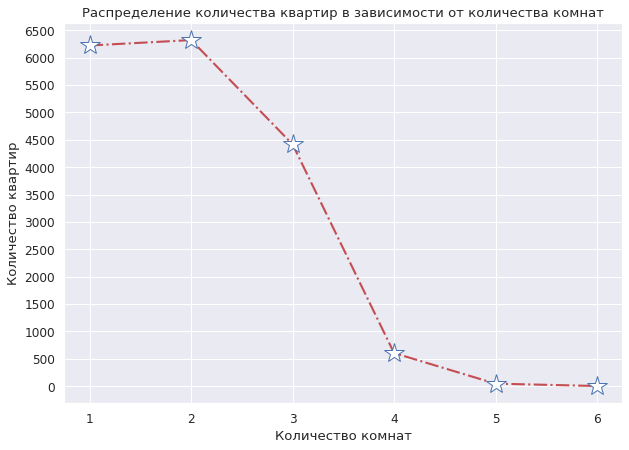

In [31]:
x=rooms['rooms']
y=rooms['count_rooms']
plt.figure(figsize=(10,7))
plt.plot(x, y, 'r-.*', lw=2.1, ms=20, mec='b', mfc='w')
plt.yticks(np.arange(7000 , step=500))
plt.xticks(np.arange(1, 7))
plt.title('Распределение количества квартир в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show();

In [32]:
df.groupby('rooms').agg({'total_area':['max', 'min', 'mean'],
                        'last_price':['max', 'min', 'mean'],
                         'kitchen_area':['max', 'min', 'mean']}).reset_index()

rooms total_area                   last_price                           \
               max   min       mean         max        min          mean   
0     1      106.9  30.1  38.291360  14900000.0  1510000.0  3.927153e+06   
1     2      109.0  31.5  54.851176  14999000.0  1540000.0  5.272959e+06   
2     3      109.0  40.1  72.062133  14990000.0  1550000.0  6.405732e+06   
3     4      109.7  48.0  81.494000  14750000.0  1700000.0  7.029557e+06   
4     5      109.3  66.3  95.839130  14000000.0  1900000.0  7.648913e+06   
5     6      106.0  87.0  96.000000  12000000.0  6100000.0  8.321333e+06   

  kitchen_area                   
           max   min       mean  
0        19.92  5.10   9.655568  
1        19.90  5.04   9.308791  
2        19.94  5.10   9.603367  
3        19.00  5.10   9.162959  
4        15.70  6.50  10.302174  
5        15.00  5.90  11.300000

**Вывод** Средняя площадь кухни практически одинакова во всех квартирах, тогда как увеличивается количество комнат и соответсвенно увеличивается средняя общая площадь в квартирах на +-15 кв.м. При этом средняя цена на квартиры увеличивается на +-1 млн, значит цена напрямую зависит от количества комнат и общей площади. 

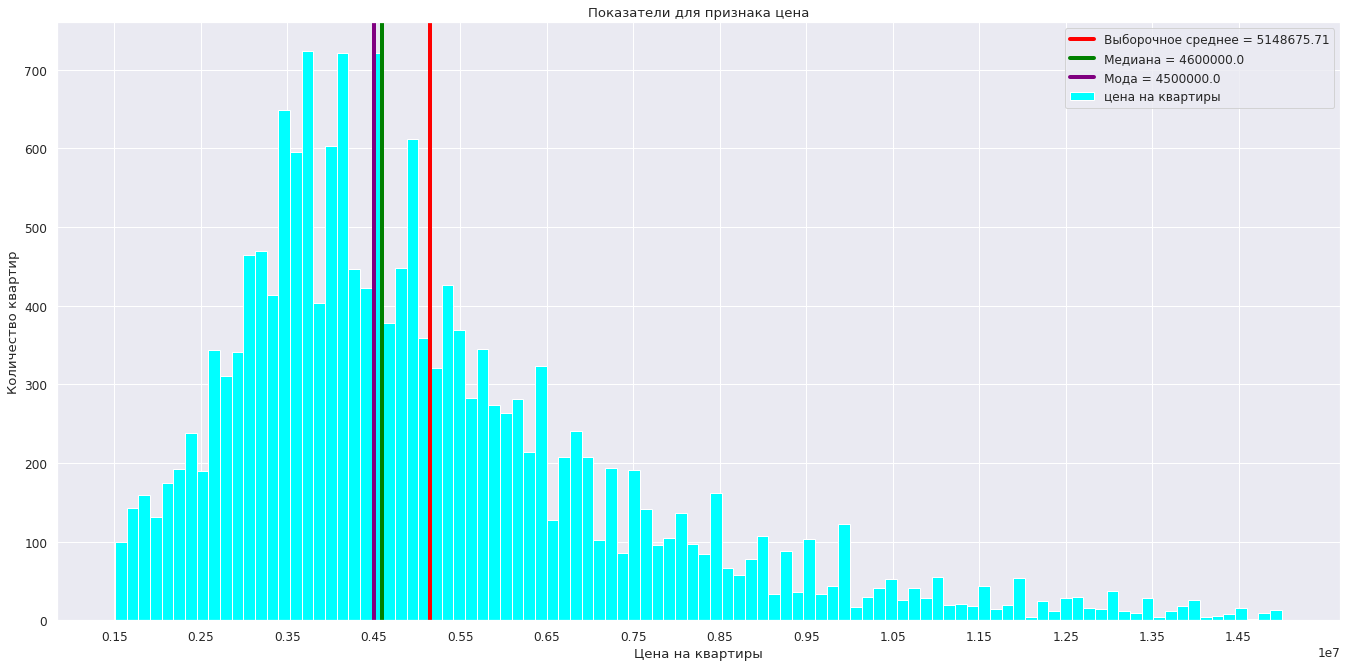

In [33]:
ax=df.plot(kind='hist', y = 'last_price', figsize=(23,11), bins=100, rwidth=1,
           color='aqua', label='цена на квартиры')
ax.set_xticks(np.arange(1500000, 15000001, step=1000000))
ax.axvline(df.last_price.mean(), color='red', label='Выборочное среднее = {}'.format(round(df.last_price.mean(),2)), lw=4)
ax.axvline(df.last_price.median(), color='green', label='Медиана = {}'.format(df.last_price.median()), lw=4)
ax.axvline(df.last_price.mode()[0], color='purple', label='Мода = {}'.format(df.last_price.mode()[0]), lw=4)
ax.set_xlabel('Цена на квартиры')
ax.set_ylabel('Количество квартир')
ax.set_title('Показатели для признака цена')
ax.legend();

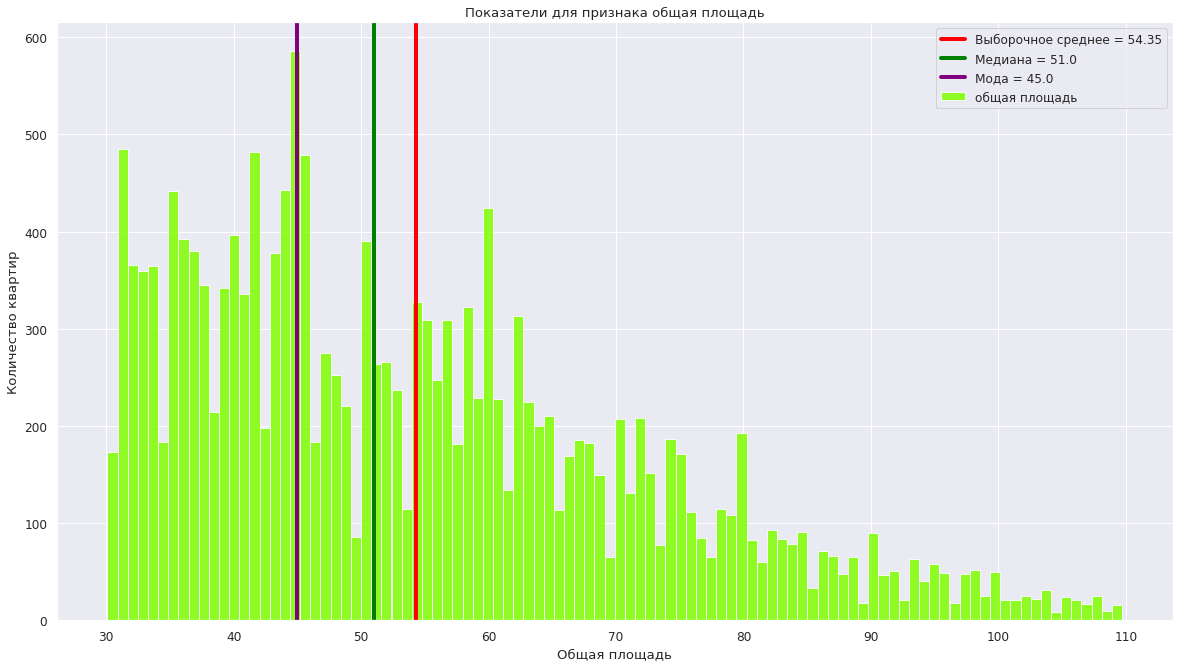

In [34]:
ax=df.plot(kind='hist', y = 'total_area', figsize=(20,11), bins=100, rwidth=1,
           color='chartreuse', alpha=0.85, label='общая площадь')
ax.set_xticks(np.arange(30, 111, step=10))
ax.axvline(df.total_area.mean(), color='red', label='Выборочное среднее = {}'.format(round(df.total_area.mean(),2)), lw=4)
ax.axvline(df.total_area.median(), color='green', label='Медиана = {}'.format(df.total_area.median()), lw=4)
ax.axvline(df.total_area.mode()[0], color='purple', label='Мода = {}'.format(df.total_area.mode()[0]), lw=4)
ax.set_xlabel('Общая площадь')
ax.set_ylabel('Количество квартир')
ax.set_title('Показатели для признака общая площадь')
ax.legend();

##Построение регрессионной модели

In [35]:
X_train, x_test, Y_train, y_test=train_test_split(df.drop('last_price', axis=1),
                                                  df['last_price'], test_size=0.25,
                                                  random_state=42)

In [36]:
lr=LinearRegression()

In [37]:
lr1=lr.fit(X_train, Y_train)

In [38]:
pred1=lr.predict(x_test)

In [39]:
mse1=mean_squared_error(y_test, pred1)

In [40]:
r2_1=r2_score(y_test, pred1)

In [41]:
mape1=mean_absolute_percentage_error(y_test, pred1)

In [42]:
errors={'множественная регрессия на основе всех признаков':{'MSE':mse1, 'r2_score':r2_1, 'MAPE':mape1}}

In [43]:
X_train, x_test, Y_train, y_test=train_test_split(df[['total_area', 'rooms', 'kitchen_area', 
                'ceiling_height', 'balcony', 'city_centers_nearest']], df['last_price'], 
                test_size=0.25, random_state=42)

In [44]:
lr2=lr.fit(X_train, Y_train)

In [45]:
pred2=lr.predict(x_test)

In [46]:
mse2=mean_squared_error(y_test, pred2)

In [47]:
r2_2=r2_score(y_test, pred2)

In [48]:
mape2=mean_absolute_percentage_error(y_test, pred2)

In [49]:
errors['множественная регрессия на основе 6 признаков']={'MSE':mse2, 'r2_score':r2_2, 'MAPE':mape2}
errors

{'множественная регрессия на основе всех признаков': {'MSE': 1839184258792.0803,
  'r2_score': 0.6612824616133148,
  'MAPE': 0.22451635075670456},
 'множественная регрессия на основе 6 признаков': {'MSE': 2171943017500.7322,
  'r2_score': 0.5999991904632949,
  'MAPE': 0.25097331927708294}}

In [50]:
X_train, x_test, Y_train, y_test=train_test_split(np.array(df['total_area']).reshape(-1,1), 
                                                  np.array(df['last_price']).reshape(-1,1), 
                test_size=0.25, random_state=42)

In [51]:
lr3=lr.fit(X_train, Y_train)

In [52]:
pred3=lr.predict(x_test)

In [53]:
mse3=mean_squared_error(y_test, pred3)

In [54]:
r2_3=r2_score(y_test, pred3)

In [55]:
mape3=mean_absolute_percentage_error(y_test, pred3)

In [56]:
errors['парная регрессия по признаку общая площадь']={'MSE':mse3, 'r2_score':r2_3, 'MAPE':mape3}

In [57]:
X_train, x_test, Y_train, y_test=train_test_split(np.array(df['rooms']).reshape(-1,1), 
                                                  np.array(df['last_price']).reshape(-1,1), 
                test_size=0.25, random_state=42)

In [58]:
lr4=lr.fit(X_train, Y_train)

In [59]:
pred4=lr.predict(x_test)

In [60]:
mse4=mean_squared_error(y_test, pred4)

In [61]:
r2_4=r2_score(y_test, pred4)

In [62]:
mape4=mean_absolute_percentage_error(y_test, pred4)

In [63]:
errors['парная регрессия по признаку количество комнат']={'MSE':mse4, 'r2_score':r2_4, 'MAPE':mape4}

In [64]:
errors_table=pd.DataFrame(errors)
errors_table

,множественная регрессия на основе всех признаков,множественная регрессия на основе 6 признаков,парная регрессия по признаку общая площадь,парная регрессия по признаку количество комнат
MSE,1.839184e+12,2.171943e+12,2.734585e+12,4.438659e+12
r2_score,6.612825e-01,5.999992e-01,4.963790e-01,1.825443e-01
MAPE,2.245164e-01,2.509733e-01,2.722683e-01,3.549083e-01


**Вывод** По показателям MSE(чем меньше, тем лучше), r2_score(производительность модели, чем выше, тем лучше) и MAPE(процент ошибки между прогнозом и фактом) можно сделать вывод, что множественная регрессия на основе всех признаков самая состоятельная.

##Гипотезы

* **H0 = различие в значениях площадей кухни в 2-х и 3-х комнатных квартирах статистически незначимо**

* **H1 = средние значение площадей кухни в 2-х и 3-х квартирах не равно**

**P-value примем как 0,5**

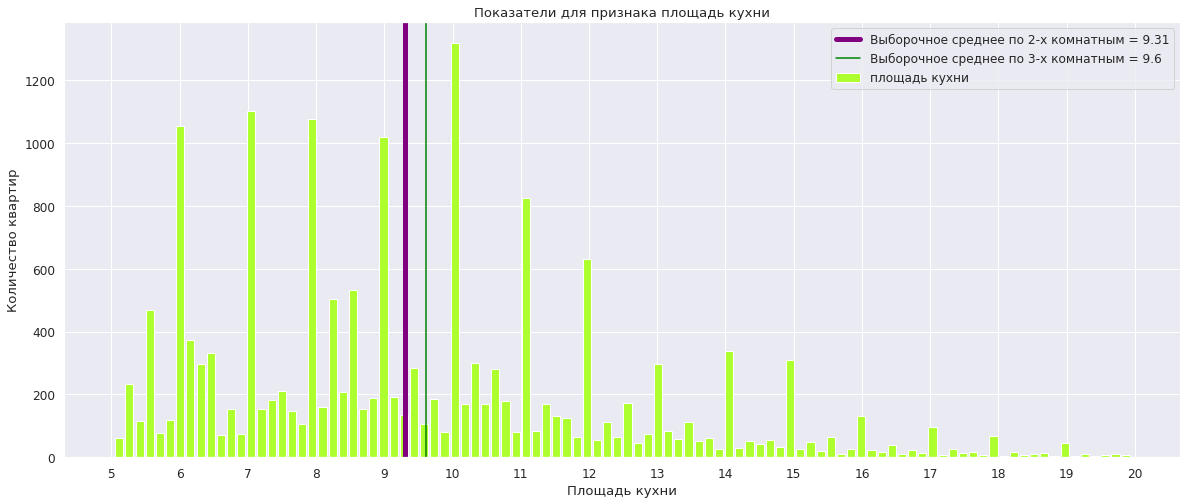

In [65]:
ax=df.plot(kind='hist', y = 'kitchen_area', figsize=(20,8), bins=100, rwidth=0.8,
           color='greenyellow', label='площадь кухни')
ax.set_xticks(np.arange(5, 21))
ax.axvline(df[df['rooms']==2].kitchen_area.mean(), color='purple', label='Выборочное среднее по 2-х комнатным = {}'.
           format(round(df[df['rooms']==2].kitchen_area.mean(),2)), lw=5)
ax.axvline(df[df['rooms']==3].kitchen_area.mean(), color='green', label='Выборочное среднее по 3-х комнатным = {}'.
           format(round(df[df['rooms']==3].kitchen_area.mean(),2), lw=5))
ax.set_xlabel('Площадь кухни')
ax.set_ylabel('Количество квартир')
ax.set_title('Показатели для признака площадь кухни')
ax.legend();

Проверка на нормальномть распределения будет производиться по тесту Андерсона-Дарлинга, т.к. количество значений two_rooms превышает 5000

In [66]:
two_rooms=df[df['rooms']==2].kitchen_area
three_rooms=df[df['rooms']==3].kitchen_area

In [67]:
anderson(two_rooms)

AndersonResult(statistic=113.89370680873253, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [68]:
anderson(three_rooms)

AndersonResult(statistic=81.42593516496345, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Так как тестовая статистика превышает все критические значения это означает, что выборки распределены не нормально. Поэтому для сравнения средних будем использовать критерий Манна-Уитни

In [69]:
mannwhitneyu(two_rooms, three_rooms)

MannwhitneyuResult(statistic=13284222.5, pvalue=2.1883610868650948e-05)

**Вывод** При применении критерия p-value не превышает критического значения, соответсвенно гипотезу H0 отвергаем. Различия в значениях площадей кухни в 2-х и 3-х комнатных квартирах статистически значимо.

##Выводы по исследованию

* В данной работе необходимо было исследовать какие параметры влияют на цену квартиры, построить прогноз стоимости квартиры в зависимости от этих параметров, а также проверить гипотезу о том, что разница в площадях кухни в 2-х и 3-х комнатных квартирах статистически не значима.
* При проведении работы поэтапно были обработаны данные - убраны дубликаты, аномалии, пропуски, а также скорректированны заголовки и данные. 
* Для проверки влияния на стоимость квартиры были вычислены коэффициент корреляции, а также min, max и средние показатели по критериям, у которых к целевому признаку был повышенный коэффициент корреляции. По группировкам стало понятно, что больше всего на стоимость квартиры влияют такие критерии, как общая площадь и количество комнат. Также было выявлено, что больше всего спросом пользуются 1-2-3-комнатные квартиры.
* При построении модели регрессии было выявлено, что множественная регрессия на основе всех признаков самая состоятельная. 
* При проверке гипотезы было выявлено, что разница в площадях кухни в 2-х и 3-х комнатных квартирах статистически значима.